In [30]:
import pandas as pd
df_clarin = pd.read_csv('big_clarin.csv')
df_clarin['source'] = 0
df_clarin = df_clarin.sample(998)
df_destape = pd.read_csv('eldestapeweb.csv')
df_destape['source'] = 1
df = pd.concat([df_clarin,df_destape])

In [2]:
df_destape.shape

(998, 7)

In [ ]:
df.sample(5)

In [3]:
df = df.drop(['bajada', 'date', 'headline', 'link', 'section', 'volanta'], axis=1)

In [4]:
df.dropna(inplace=True)

In [5]:
df.head(5)

,articleBody,source
7479,"Hace pocos días, exactamente el lunes último –...",0
969,Alejandro Rollán - AgrovozEspecial para Clarín...,0
5889,"El escritor británico Brian Aldiss, conocido p...",0
1835,“Esto es muy diferente a lo que yo suelo prese...,0
7500,El debate sobre el sexismo explotó en Google. ...,0


In [6]:
from unidecode import unidecode
PERMITTED_CHARS = "abcdefghijklmnopqrstuvwxyz " 

def clean_string(s):
    s = s.lower()
    s = unidecode(s)
    s = "".join(c for c in s if c in PERMITTED_CHARS)
    s = " ".join(w[:5] for w in s.split(' ') if len(w) > 2)
    return s

In [7]:
def stem_text(s):
    s['articleBody'] = clean_string(s['articleBody'])
    return s
    
df = df.apply(stem_text, axis=1)

In [8]:
df.head(5)

,articleBody,source
7479,hace pocos dias exact lunes ultim pero parec m...,0
969,aleja rolla agrov para clari rural cada tres a...,0
5889,escri brita brian aldis conoc por sus relat ci...,0
1835,esto muy difer que suelo prese trio cuart expl...,0
7500,debat sobre sexis explo googl ingen softw empr...,0


In [9]:
import numpy as np
df_stopwords = pd.read_csv('./stopwords.csv', header=None)
df_stopwords.columns = ['articleBody']
df_stopwords = df_stopwords.apply(stem_text, axis=1)
df_stopwords['articleBody'].replace('', np.nan, inplace=True)
df_stopwords.dropna(inplace=True)
stopwords = list(df_stopwords['articleBody'].values)

In [10]:
stopwords

['una',
 'unas',
 'unos',
 'uno',
 'sobre',
 'todo',
 'tambi',
 'tras',
 'otro',
 'algun',
 'algun',
 'algun',
 'algun',
 'algun',
 'ser',
 'soy',
 'eres',
 'somos',
 'sois',
 'estoy',
 'esta',
 'estam',
 'estai',
 'estan',
 'como',
 'para',
 'atras',
 'porqu',
 'por que',
 'estad',
 'estab',
 'ante',
 'antes',
 'siend',
 'ambos',
 'pero',
 'por',
 'poder',
 'puede',
 'puedo',
 'podem',
 'podei',
 'puede',
 'fui',
 'fue',
 'fuimo',
 'fuero',
 'hacer',
 'hago',
 'hace',
 'hacem',
 'hacei',
 'hacen',
 'cada',
 'fin',
 'inclu',
 'prime',
 'desde',
 'conse',
 'consi',
 'consi',
 'consi',
 'conse',
 'consi',
 'voy',
 'vamos',
 'vais',
 'van',
 'vaya',
 'gueno',
 'tener',
 'tengo',
 'tiene',
 'tenem',
 'tenei',
 'tiene',
 'las',
 'los',
 'aqui',
 'mio',
 'tuyo',
 'ellos',
 'ellas',
 'nos',
 'nosot',
 'vosot',
 'vosot',
 'dentr',
 'solo',
 'solam',
 'saber',
 'sabes',
 'sabe',
 'sabem',
 'sabei',
 'saben',
 'ultim',
 'largo',
 'basta',
 'haces',
 'mucho',
 'aquel',
 'sus',
 'enton',
 'tiemp',

In [11]:
X = df['articleBody']
y = df['source']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, stop_words=stopwords)
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['una', 'unas', 'unos', 'uno', 'sobre', 'todo', 'tambi', 'tras', 'otro', 'algun', 'algun', 'algun', 'algun', 'algun', 'ser', 'soy', 'eres', 'somos', 'sois', 'estoy', 'esta', 'estam', 'estai', 'estan', 'como', 'para', 'atras', 'porqu', 'por que', 'estad', 'estab', 'ante', 'antes', 'siend',...raba', 'podri', 'podri', 'podri', 'podri', 'podri', 'aquel', 'desta', 'eldes', 'leer', 'mas', 'mas'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [14]:
X_train_tfidf = vectorizer.transform(X_train)

In [15]:
X_train_tfidf.shape

(1335, 3064)

In [16]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=20)

In [17]:
svd.fit(X_train_tfidf)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=20,
       random_state=None, tol=0.0)

In [18]:
X_train_tfidf_2d = svd.transform(X_train_tfidf)

In [19]:
X_train_tfidf_2d.shape

(1335, 2)

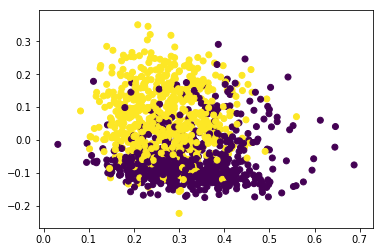

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train_tfidf_2d[:,0], X_train_tfidf_2d[:,1], c=y_train)

In [21]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=20)

In [22]:
svd.fit(X_train_tfidf)

TruncatedSVD(algorithm='randomized', n_components=3, n_iter=20,
       random_state=None, tol=0.0)

In [23]:
X_train_tfidf_3d = svd.transform(X_train_tfidf)

In [24]:
X_train_tfidf_3d.shape

(1335, 3)

In [25]:
type(X_train_tfidf_3d)

numpy.ndarray

In [26]:
X_rotated= np.dot(X_train_tfidf_3d,[[0,-1,0],[1,0,0],[0,0,1]])

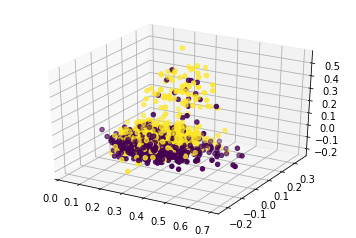

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_tfidf_3d[:,0], X_train_tfidf_3d[:,1], X_train_tfidf_3d[:,2], c=y_train)


In [28]:
c_aux = [4 if(x == 0) else 16 for x in y_train]

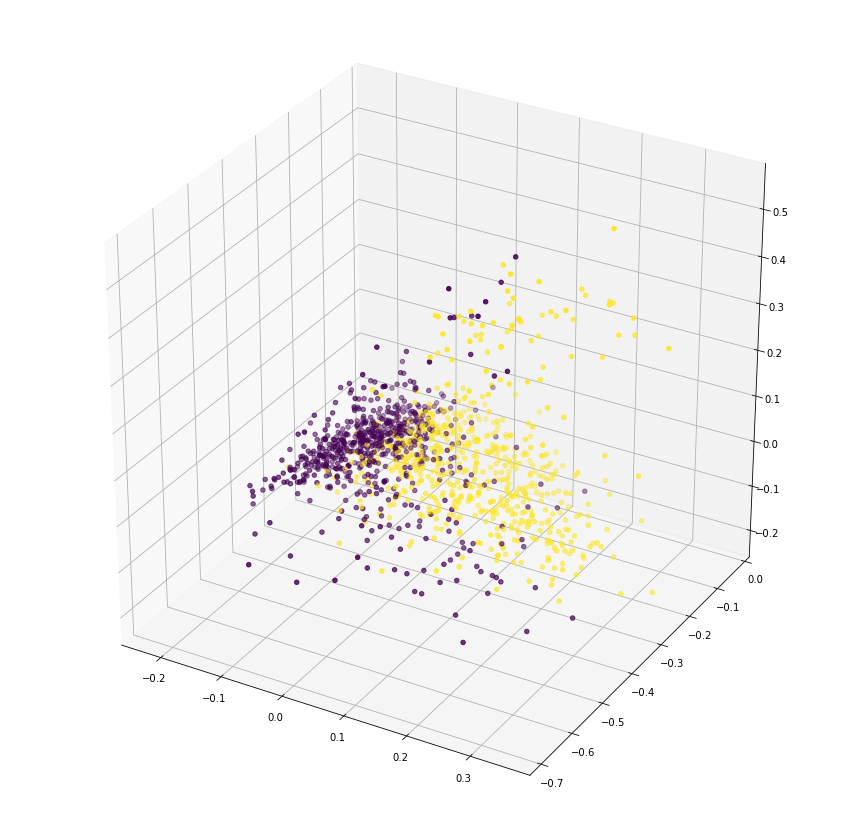

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_rotated[:,0], X_rotated[:,1], X_rotated[:,2], c=c_aux);